# Time Varying Frequencies in a single SFT

So far I have concentrated on fixed frequency signals and templates. But the problem Clare is working on focusses on slowly time varying frequencies. First thing is see how they respond to the reconstruction technique developed in Clare3 and Clare 4. The particular class of signals in question are limited to varying their frequency by no more than 1/2 a frequency bin over the duration of the SFT. So I will look at an example that varies by that much. I am going to use somewhat longer samples for this that I have previously (if tiny compared to Clare's).

We start with the tools, as usual.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Using 10 seconds worth of 10 ksps signal means that I will have frequency bins that are only 0.1 Hz wide. So, to change by half a bin in 10 seconds gives us a rate of change of frequency of 0.05/10 = 0.005 Hz/s.

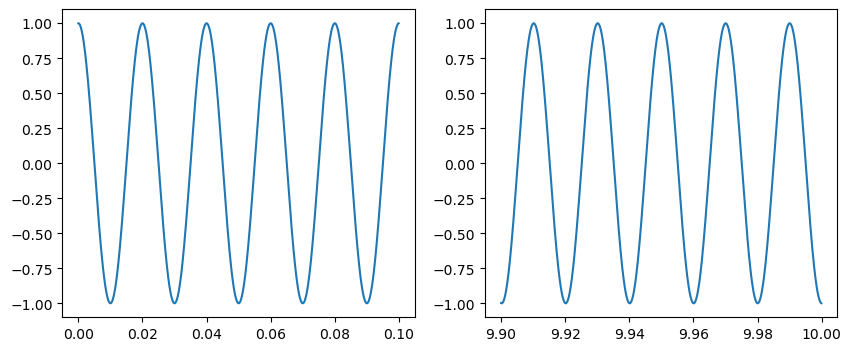

In [2]:
rate = 10_000
duration = 10.0
nSample = int(rate * duration)
time = np.linspace(0.0, duration, num=nSample, endpoint=False)
freq0 = 50.0
freqDot = 0.005
w0 = 2 * np.pi * freq0
wDot = 2 * np.pi * freqDot
sig = np.cos((w0 + wDot * time) * time)
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.plot(time[:1000], sig[:1000])
ax2 = fig.add_subplot(122)
ax2.plot(time[-1000:], sig[-1000:])


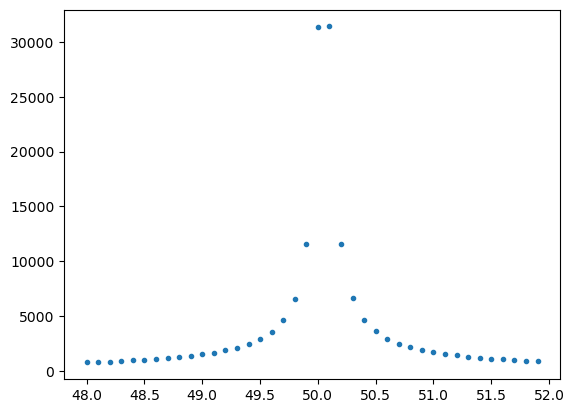

In [3]:
SFT = np.fft.rfft(sig)
nFreq = int(nSample/2)+1
freq = np.linspace(0, 1/(time[2]-time[0]), num=nFreq)
# plt.plot(freq[:1000], np.absolute(SFT[:1000]), '.')
plt.plot(freq[480:520], np.absolute(SFT[480:520]), '.')

There is the dataa for our template but we have to scale it using the rule. Note that I then print the sum of the squared weights to make sure we did it right.

In [4]:
denom = np.sqrt(np.sum(np.square(np.absolute(SFT))))
print(denom)
tSFT = SFT/denom
print(np.sum(np.square(np.absolute(tSFT))))

50000.000010007985
0.9999999999999997


Now we make a noisy version of the signal.

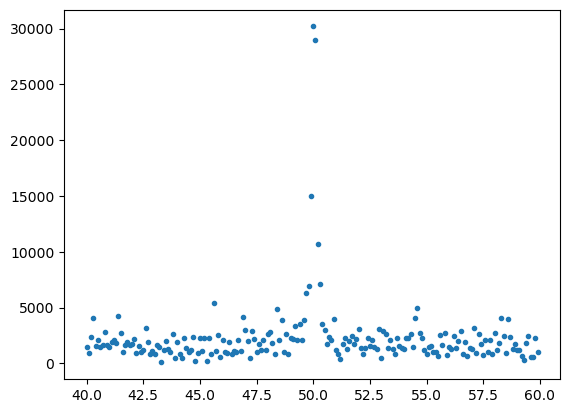

In [5]:
rng = np.random.default_rng()
noise = rng.uniform(low=-10.0, high=10.0, size=nSample)
nSig = sig + noise
nSFT = np.fft.rfft(nSig)
plt.plot(freq[400:600], np.absolute(nSFT[400:600]), '.')

Well, first we see that we don't have anything like enough noise! Our S/N is very nice, somewhere near 8. Running our template dot product gives us

In [6]:
print(np.sqrt(np.vdot(tSFT, nSFT).real))

219.06590900700547


This contrasts with the value

(-2010.127520942663+367.9860281773754j)
45.205451168451866


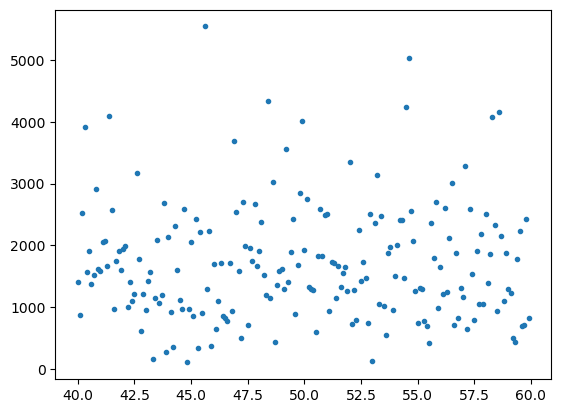

In [7]:
nFT = np.fft.rfft(noise)
plt.plot(freq[400:600], np.absolute(nFT[400:600]), '.')
ndot = np.vdot(tSFT, nFT)
print(ndot)
print(np.sqrt(np.absolute(ndot)))

for the pure noise case, giving us a S/N of about 7.

Let's look at the two products before their summation. First, the noise.

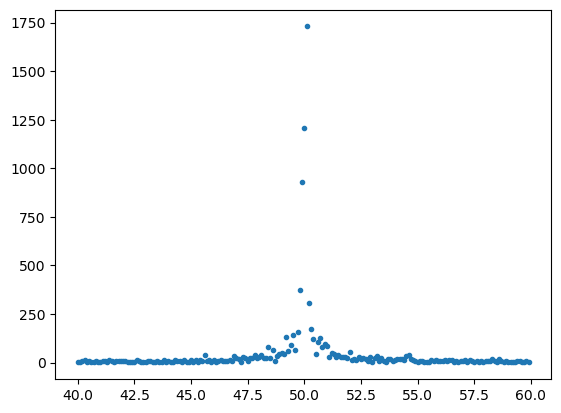

In [8]:
wNFT = tSFT.conjugate() * nFT
plt.plot(freq[400:600], np.absolute(wNFT[400:600]), '.')

Then the signal

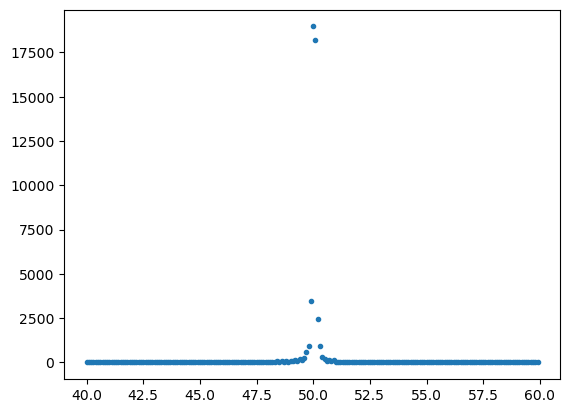

In [9]:
wSFT = tSFT.conjugate() * nSFT
plt.plot(freq[400:600], np.absolute(wSFT[400:600]), '.')

What if we do the real and imag parts? First the noise

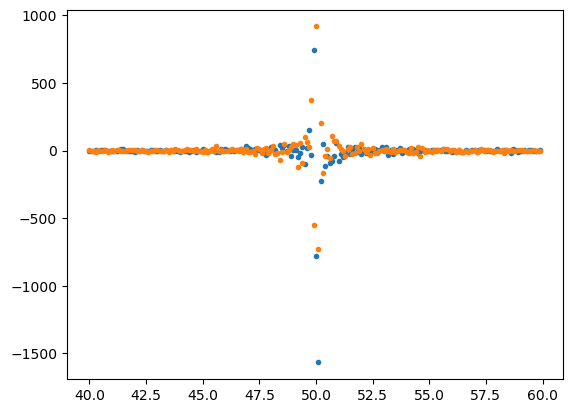

In [10]:
plt.plot(freq[400:600], wNFT[400:600].real, '.', freq[400:600], wNFT[400:600].imag, '.')

In [11]:
print(np.sum(wNFT.real), np.sum(wNFT.imag))

-2010.1275209426503 367.9860281773705


Keith's $h_0$ document normalizes the noise to 1 in the sense that 
$$\left<\left|n_j\right|^{2}\right>=\left<n_{j,real}^2 + n_{j,imag}^2\right>=1$$
what is true about our noise?

In [12]:
print(np.sum(nFT.conjugate() * nFT))

(165748038207.37616+1.115465374601025e-08j)


Really rather not true! But it is real to within representation noise.